In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib
import datetime
%matplotlib inline

In [4]:
df = pd.read_csv('../data/session_count_by_day.csv')
df.head()

,ds,y
0,2013/02/01,107.0
1,2013/02/02,66.0
2,2013/02/03,36.0
3,2013/02/04,129.0
4,2013/02/05,154.0


In [3]:
christmases = pd.DataFrame({
    'holiday': 'Christmas',
    'ds': pd.to_datetime(['2017-12-25','2016-12-25','2057-12-25','2014-12-25']),
    'lower_window': -1,
    'upper_window': 7
})

easters = pd.DataFrame({
  'holiday': 'easter',
  'ds': pd.to_datetime(['2017-04-16', '2016-03-27', '2015-04-05', '2014-04-20', '2013-03-31']),
  'lower_window': -1,
  'upper_window': 1,
})

thanksgivings = pd.DataFrame({
    'holiday': 'thanksgiving',
    'ds': pd.to_datetime(['2013-11-28', '2014-11-27', '2015-11-26', '2016-11-24', '2017-11-23']),
    'lower_window': 0,
    'upper_window': 1
})

veterans_days = pd.DataFrame({
    'holiday': 'veterans day',
    'ds': pd.to_datetime(['2013-11-11', '2014-11-11', '2015-11-11', '2016-11-11', '2017-11-10']),
    'lower_window': 0,
    'upper_window': 0
})
holidays = pd.concat((easters, christmases, thanksgivings, veterans_days))

In [5]:
m = Prophet(holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [6]:
export = forecast[forecast.ds >= '2017-03-17']
export[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('../models/predictions_by_hour.csv', index=False, header=['date', 'prediction', 'prediction_lower', 'prediction_upper'])

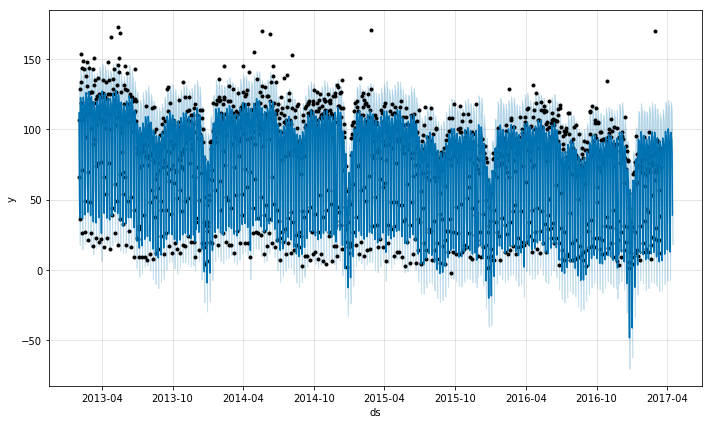

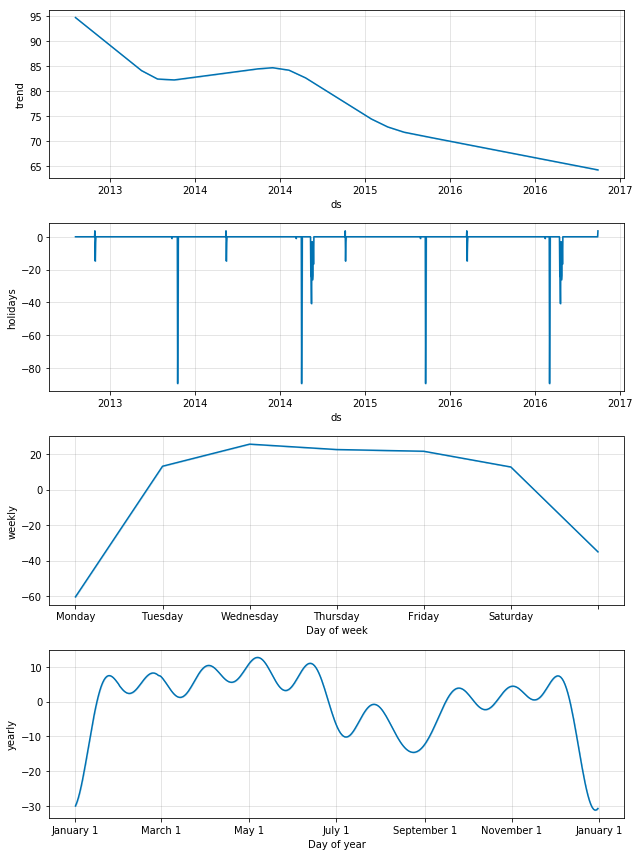

In [7]:
%matplotlib inline
m.plot(forecast);
m.plot_components(forecast);